In [1]:
print("Input dataset name:")
dataset = raw_input()
#dataset = 'HTo2LongLivedTo4b_MH-125_MFF-25_CTau-15000mm_TuneCP5_14TeV_pythia8'

Input dataset name:
Data


In [2]:
from ROOT import TFile, TTree, TH1I
from ROOT import gROOT, AddressOf
import uproot
from array import array
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.14/09


In [3]:
comp_ME11 = array('f', [0.])
comp_ME12 = array('f', [0.])
comp_ME13 = array('f', [0.])
comp_ME21 = array('f', [0.])
comp_ME22 = array('f', [0.])
comp_ME31 = array('f', [0.])
comp_ME32 = array('f', [0.])
comp_ME41 = array('f', [0.])
comp_ME42 = array('f', [0.])

wire_ME11 = array('f', [0.])
wire_ME12 = array('f', [0.])
wire_ME13 = array('f', [0.])
wire_ME21 = array('f', [0.])
wire_ME22 = array('f', [0.])
wire_ME31 = array('f', [0.])
wire_ME32 = array('f', [0.])
wire_ME41 = array('f', [0.])
wire_ME42 = array('f', [0.])


In [4]:
in_path = "/uscms/home/menendez/nobackup/Trigger/CMSSW_10_6_4/src/Data/TPEHists_" + dataset + ".root"
out_path = "trees/MaxDigis_tree_" + dataset + ".root"

# f = TFile( out_path, 'RECREATE' )
# comp_tree = TTree( 'comparator', 'Max Comparator digis in a single chamber in each ring per event' )
# wire_tree = TTree( 'wire', 'Max Comparator digis in a single chamber in each ring per event' )
# comp_tree.Branch( 'Ev_max_nComp_ME11', comp_ME11, 'comp_ME11/F')
# comp_tree.Branch( 'Ev_max_nComp_ME12', comp_ME12, 'comp_ME12/F')
# comp_tree.Branch( 'Ev_max_nComp_ME13', comp_ME13, 'comp_ME13/F')
# comp_tree.Branch( 'Ev_max_nComp_ME21', comp_ME21, 'comp_ME21/F')
# comp_tree.Branch( 'Ev_max_nComp_ME22', comp_ME22, 'comp_ME22/F')
# comp_tree.Branch( 'Ev_max_nComp_ME31', comp_ME31, 'comp_ME31/F')
# comp_tree.Branch( 'Ev_max_nComp_ME32', comp_ME32, 'comp_ME32/F')
# comp_tree.Branch( 'Ev_max_nComp_ME41', comp_ME41, 'comp_ME41/F')
# comp_tree.Branch( 'Ev_max_nComp_ME42', comp_ME42, 'comp_ME42/F')

# wire_tree.Branch( 'Ev_max_nWire_ME11', wire_ME11, 'wire_ME11/F')
# wire_tree.Branch( 'Ev_max_nWire_ME12', wire_ME12, 'wire_ME12/F')
# wire_tree.Branch( 'Ev_max_nWire_ME13', wire_ME13, 'wire_ME13/F')
# wire_tree.Branch( 'Ev_max_nWire_ME21', wire_ME21, 'wire_ME21/F')
# wire_tree.Branch( 'Ev_max_nWire_ME22', wire_ME22, 'wire_ME22/F')
# wire_tree.Branch( 'Ev_max_nWire_ME31', wire_ME31, 'wire_ME31/F')
# wire_tree.Branch( 'Ev_max_nWire_ME32', wire_ME32, 'wire_ME32/F')
# wire_tree.Branch( 'Ev_max_nWire_ME41', wire_ME41, 'wire_ME41/F')
# wire_tree.Branch( 'Ev_max_nWire_ME42', wire_ME42, 'wire_ME42/F')



In [5]:
comp_beat=[0]
wire_beat=[0]

In [6]:
if dataset=="Data":
  MC = False
  Neutrino = False
elif dataset=="Neutrino_gun" or dataset=="Nu_E10-pythia8-gun":
  MC = False
  Neutrino = True
else:
  MC = True
  Neutrino = False

if MC:
  File = TFile(in_path,"READ")
elif Neutrino:
  File = TFile("/uscms/home/menendez/nobackup/Trigger/CMSSW_10_6_4/src/Data/TPEHists_Neutrino_gun.root","READ")
else:
  File = TFile("/uscms/home/menendez/nobackup/Trigger/CMSSW_10_6_4/src/Data/TPEHists_Data.root","READ")
clct = File.Get("lctreader/Ev_clcttree")
alct = File.Get("lctreader/Ev_alcttree")
llp = File.Get("lctreader/llp")

nEntries_clct = clct.GetEntries()
nEntries_alct = alct.GetEntries()
if MC:
  nEntries_llp = llp.GetEntries()

In [7]:
llp_accept = []
#max_nComp = np.array([0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0])
max_nComp = np.zeros((5,4))
max_nWire = np.zeros((5,4))
lastEventclct = 0
lastEventalct = 0

comp_thresh = [[98,56,30],[49,42,0],[49,35,0],[42,31,0]]
wire_thresh = [[104,92,32],[133,83,0],[130,74,0],[127,88,0]]

print comp_thresh[2][1]

35


In [8]:
if MC:
  print "Finding LLP Acceptance"
  for i in tqdm(range(0, nEntries_llp)):
    llp.GetEntry(i)

    if(llp.llp_in_acceptance[0]==1 or llp.llp_in_acceptance[1]==1):
      llp_accept.append(llp.event)

Starting CLCT Analysis


100%|██████████| 21041797/21041797 [16:15<00:00, 21570.58it/s]


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 3., 2., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 2., 0.,
        0., 1., 2., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 2., 0., 1., 0., 1., 0.,
        0., 

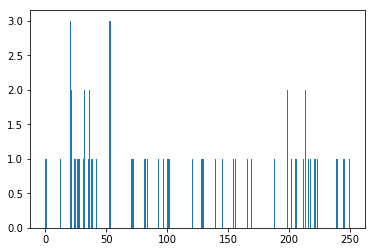

In [9]:
print "Starting CLCT Analysis"
for i in tqdm(range(0, nEntries_clct)):
  clct.GetEntry(i)

  if MC:
    if clct.t_Event not in llp_accept:
      continue
    
  if(clct.t_Event!=lastEventclct):
    lastEventclct = clct.t_Event
    
#     comp_ME11[0] = max_nComp[1][1]
#     comp_ME12[0] = max_nComp[1][2]
#     comp_ME13[0] = max_nComp[1][3]
#     comp_ME21[0] = max_nComp[2][1]
#     comp_ME22[0] = max_nComp[2][2]
#     comp_ME31[0] = max_nComp[3][1]
#     comp_ME32[0] = max_nComp[3][2]
#     comp_ME41[0] = max_nComp[4][1]
#     comp_ME42[0] = max_nComp[4][2]
    max_nComp = np.zeros((5,4))

#     comp_tree.Fill()
       
        
  if clct.t_nComp > max_nComp[clct.t_station][clct.t_ring]:
    max_nComp[clct.t_station][clct.t_ring] = clct.t_nComp
    if max_nComp[clct.t_station][clct.t_ring] > comp_thresh[clct.t_station-1][clct.t_ring-1]:
        #print "%i,%i,%i" %(clct.t_station,clct.t_ring,clct.t_chamber)
        if clct.t_station == 1 and clct.t_ring == 1:
            enty = clct.t_chamber
        elif clct.t_station == 1 and clct.t_ring == 2:
            enty = clct.t_chamber + 18
        elif clct.t_station == 1 and clct.t_ring == 3:
            enty = clct.t_chamber + 18 + 36
        elif clct.t_station == 2 and clct.t_ring == 1:
            enty = clct.t_chamber + 18 + 36 + 36
        elif clct.t_station == 2 and clct.t_ring == 2:
            enty = clct.t_chamber + 18 + 36 + 36 + 18
        elif clct.t_station == 3 and clct.t_ring == 1:
            enty = clct.t_chamber + 18 + 36 + 36 + 18 + 36
        elif clct.t_station == 3 and clct.t_ring == 2:
            enty = clct.t_chamber + 18 + 36 + 36 + 18 + 36 + 18
        elif clct.t_station == 4 and clct.t_ring == 1:
            enty = clct.t_chamber + 18 + 36 + 36 + 18 + 36 + 18 + 36
        elif clct.t_station == 4 and clct.t_ring == 2:
            enty = clct.t_chamber + 18 + 36 + 36 + 18 + 36 + 18 + 36 + 18
        comp_beat.append(enty)
        
plt.hist(comp_beat, bins=252)
                    

  0%|          | 1/26873238 [00:00<761:28:59,  9.80it/s]

Starting ALCT Analysis


100%|██████████| 26873238/26873238 [19:08<00:00, 23400.14it/s]


(array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 2., 0., 0., 1., 0.,
        1., 0., 1., 3., 0., 0., 2., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 2., 1., 0., 0., 0., 0., 2., 1., 1., 1., 0.,
        1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 0., 1., 1., 0., 2., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 2., 0., 1., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 

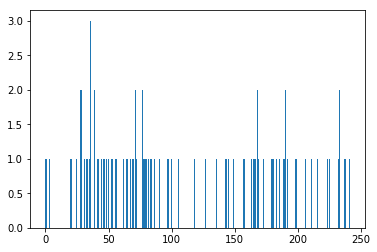

In [10]:
print "Starting ALCT Analysis"
for i in tqdm(range(0, nEntries_alct)):
  alct.GetEntry(i)

  if MC:
    if alct.t_Event not in llp_accept:
      continue
    
  if(alct.t_Event!=lastEventalct):
    lastEventalct = alct.t_Event
    
#     wire_ME11[0] = max_nWire[1][1]
#     wire_ME12[0] = max_nWire[1][2]
#     wire_ME13[0] = max_nWire[1][3]
#     wire_ME21[0] = max_nWire[2][1]
#     wire_ME22[0] = max_nWire[2][2]
#     wire_ME31[0] = max_nWire[3][1]
#     wire_ME32[0] = max_nWire[3][2]
#     wire_ME41[0] = max_nWire[4][1]
#     wire_ME42[0] = max_nWire[4][2]
    max_nWire = np.zeros((5,4))

#     wire_tree.Fill()
  

  if alct.t_nWire > max_nWire[alct.t_station][alct.t_ring]:
    max_nWire[alct.t_station][alct.t_ring] = alct.t_nWire
    if max_nWire[alct.t_station][alct.t_ring] > wire_thresh[alct.t_station-1][alct.t_ring-1]:
        #print "Station %i, Ring %i, Chamber %i, has %i digis > %i" %(alct.t_station,alct.t_ring,alct.t_chamber,max_nWire[alct.t_station][alct.t_ring],wire_thresh[alct.t_station-1][alct.t_ring-1])
        if alct.t_station == 1 and alct.t_ring == 1:
            enty = alct.t_chamber
        elif alct.t_station == 1 and alct.t_ring == 2:
            enty = alct.t_chamber + 18
        elif alct.t_station == 1 and alct.t_ring == 3:
            enty = alct.t_chamber + 18 + 36
        elif alct.t_station == 2 and alct.t_ring == 1:
            enty = alct.t_chamber + 18 + 36 + 36
        elif alct.t_station == 2 and alct.t_ring == 2:
            enty = alct.t_chamber + 18 + 36 + 36 + 18
        elif alct.t_station == 3 and alct.t_ring == 1:
            enty = alct.t_chamber + 18 + 36 + 36 + 18 + 36
        elif alct.t_station == 3 and alct.t_ring == 2:
            enty = alct.t_chamber + 18 + 36 + 36 + 18 + 36 + 18
        elif alct.t_station == 4 and alct.t_ring == 1:
            enty = alct.t_chamber + 18 + 36 + 36 + 18 + 36 + 18 + 36
        elif alct.t_station == 4 and alct.t_ring == 2:
            enty = alct.t_chamber + 18 + 36 + 36 + 18 + 36 + 18 + 36 + 18
        wire_beat.append(enty)
        
plt.hist(wire_beat, bins=252)
    
    

In [11]:
#f.Write()
#f.Close()

In [12]:
comp_domin = max(comp_beat, key=comp_beat.count)
wire_domin = max(wire_beat, key=wire_beat.count)

print "Comparator rate dominated by chamber %i" %(comp_domin)
print "Wire rate dominated by chamber %i" %(wire_domin)

Comparator rate dominated by chamber 53
Wire rate dominated by chamber 36


In [15]:
print len(wire_beat)

76
